In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import pandas as pd

In [2]:
data = pd.read_csv("data/stud.csv")

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Pattern
NULL (If there fill them)   
UNIQUE

In [4]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
num_features = data.select_dtypes(exclude="object").columns
cat_features = data.select_dtypes(include="object").columns

num_features,cat_features

(Index(['math_score', 'reading_score', 'writing_score'], dtype='object'),
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'))

In [8]:
data["total_score"] = data["math_score"] + data["writing_score"] + data["reading_score"]
data["average_score"] = data["total_score"]/3

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [9]:
data.describe()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [11]:
for i in cat_features:
    print(f"Features in {i} are: {data[i].unique()}")

Features in gender are: ['female' 'male']
Features in race_ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
Features in parental_level_of_education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Features in lunch are: ['standard' 'free/reduced']
Features in test_preparation_course are: ['none' 'completed']


<Axes: xlabel='total_score', ylabel='Count'>

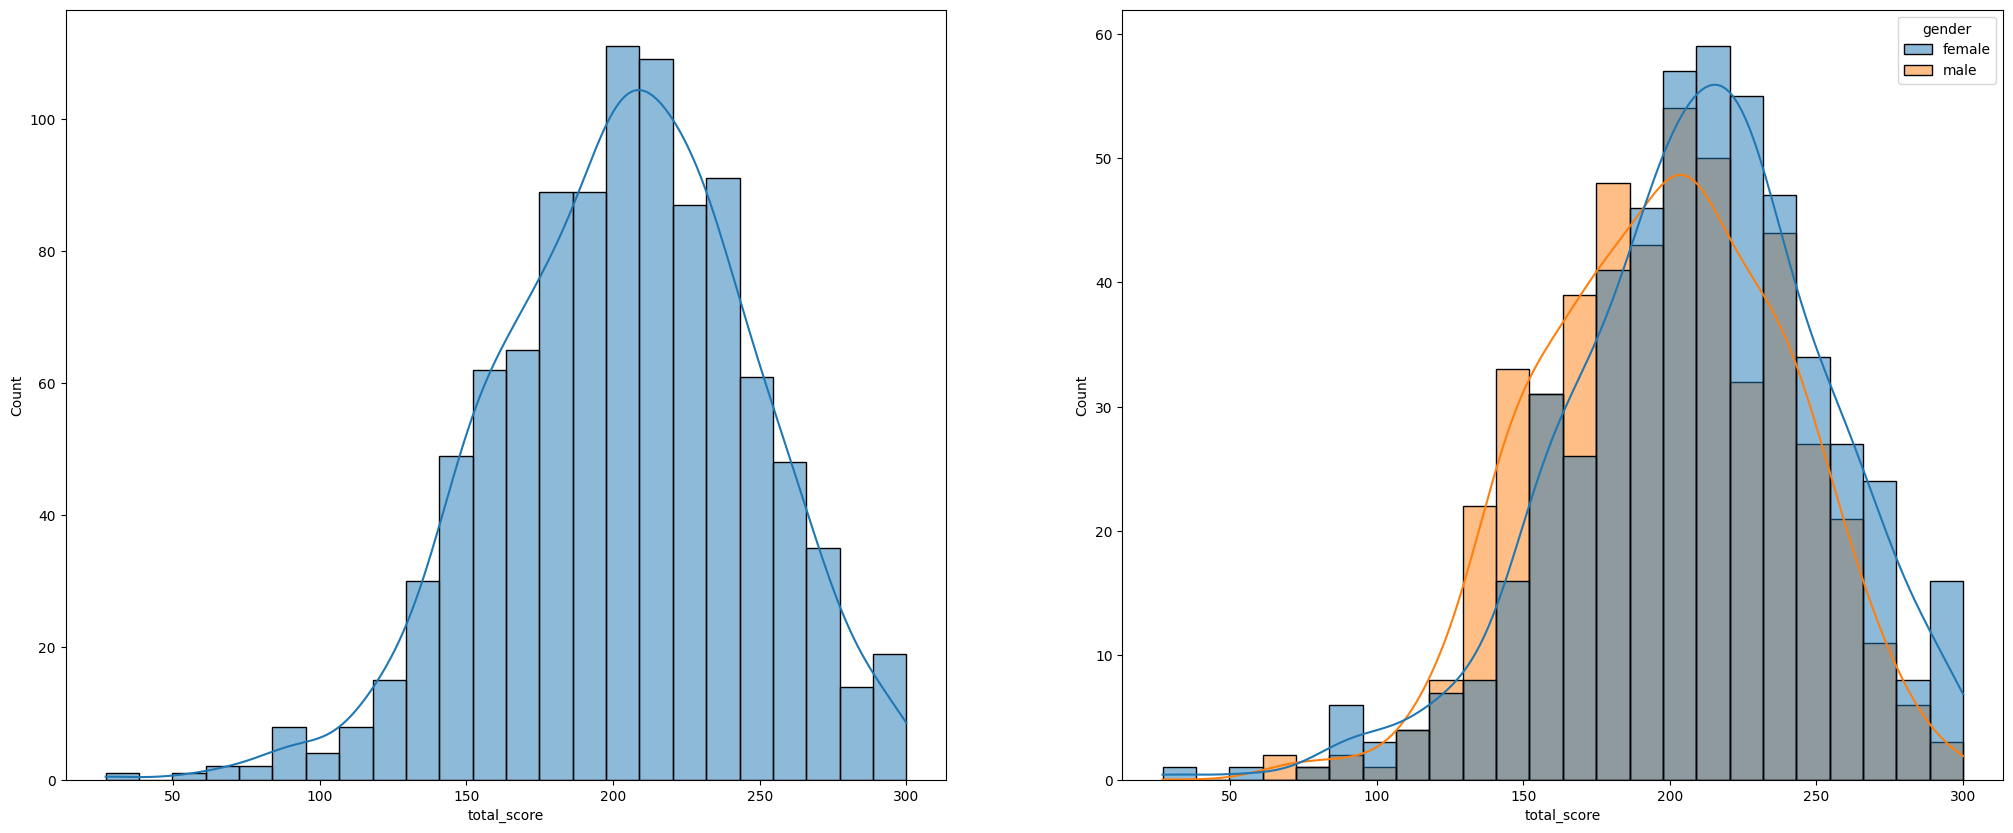

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sb.histplot(data=data,x="total_score",kde=True)
plt.subplot(1,2,2)
sb.histplot(data=data,x="total_score",hue='gender',kde=True)

<Axes: xlabel='average_score', ylabel='Count'>

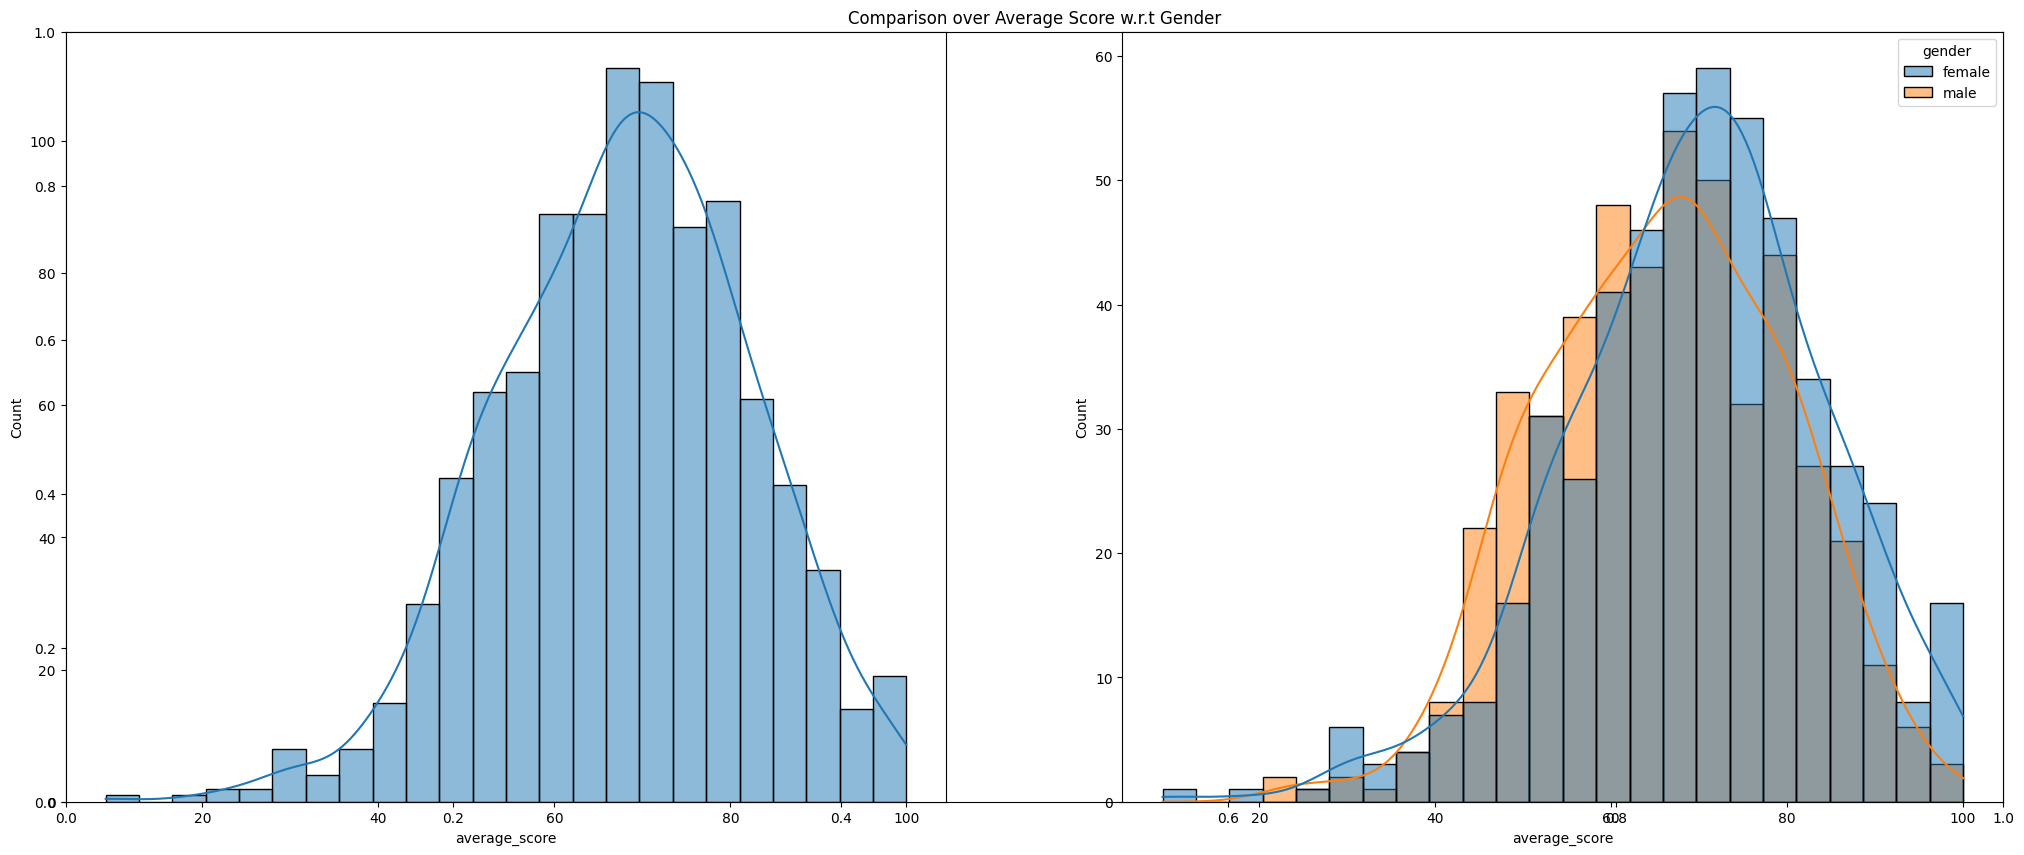

In [20]:
plt.figure(figsize=(25,10))
plt.title("Comparison over Average Score w.r.t Gender")
plt.subplot(1,2,1)
sb.histplot(data=data,x="average_score",kde=True)
plt.subplot(1,2,2)
sb.histplot(data=data,x="average_score",hue='gender',kde=True)

<Axes: xlabel='average_score', ylabel='Count'>

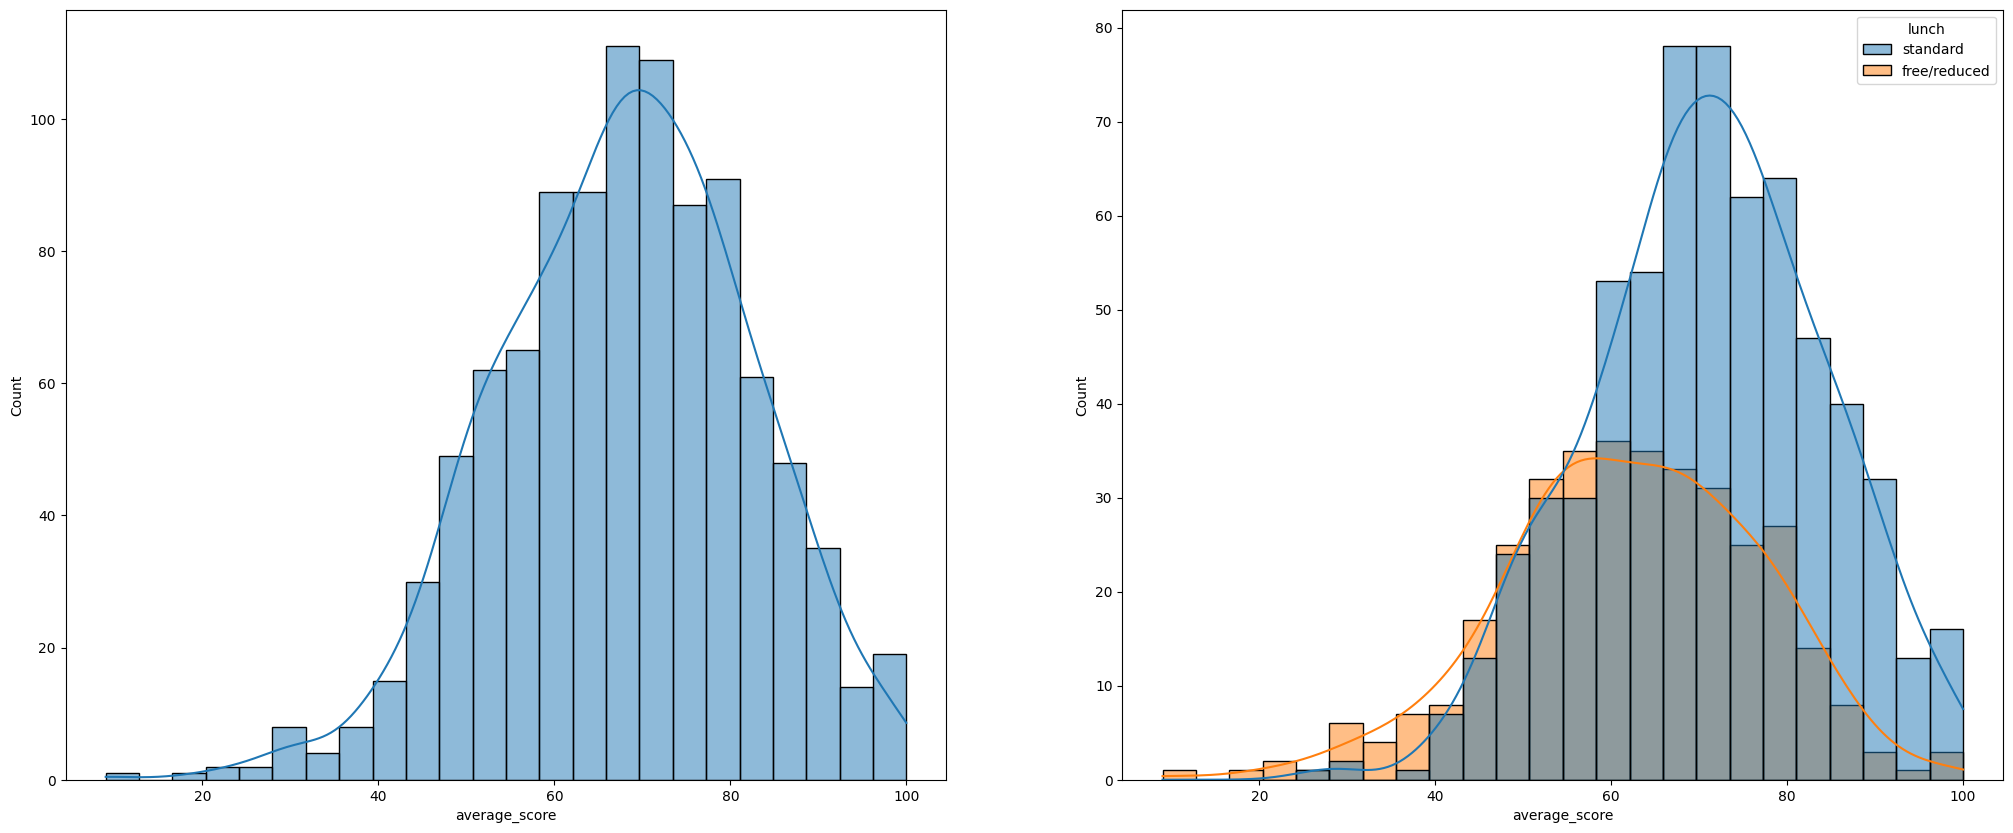

In [22]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sb.histplot(data=data,x="average_score",kde=True)
plt.subplot(1,2,2)
sb.histplot(data=data,x="average_score",hue='lunch',kde=True)